<a href="https://colab.research.google.com/github/SHAHAL-K/NLP-Casestudy/blob/main/npl_spam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import pandas as pd
import numpy as np

In [36]:
data=pd.read_csv('/content/spam.csv',encoding_errors= 'replace')

In [37]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [38]:
data.isna().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [39]:
data.shape

(5572, 5)

In [40]:
data.duplicated().sum()

403

In [41]:
data=data.drop_duplicates()

In [42]:
data=data[['v1','v2']]

In [43]:
data

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will �_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


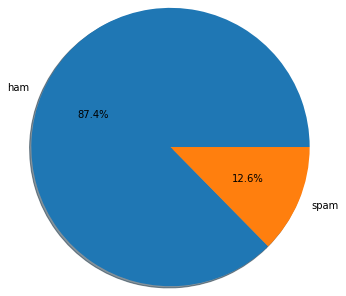

In [44]:
import matplotlib.pyplot as plt
plt.pie(data.v1.value_counts().values[0:8],labels=data.v1.value_counts().index[0:8],autopct='%1.1f%%', shadow=True, radius=1.6)
plt.show()

In [45]:
import re
def remove_num(text):
    pattern=r'[^a-zA-z.,!?/:;\"\'\s]'
    return re.sub(pattern,'',text)
data['v2']=data['v2'].apply(remove_num)
data['v2']=data['v2'].str.lower()

In [46]:
import re
def remove_url(text):
    return re.sub(r'https?:\S*''','',text)
data['v2']=data['v2'].apply(remove_url)

In [47]:
import string 
exclude=string.punctuation
def remove_punct(text):
    for i in exclude:
        text=text.replace(i,'')
    return text
data['v2']=data['v2'].apply(remove_punct)

In [48]:
import nltk
nltk.download('punkt')
data['text_token']=data['v2'].apply(lambda x:nltk.word_tokenize(x))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [49]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')
def stopword(text):
    y=[]
    for i in text:
        if i not in stopwords.words('english'):
            y.append(i)
    return y
data['text_token']=data['text_token'].apply(stopword)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [50]:
from nltk.stem import PorterStemmer
ps=PorterStemmer()
def stemmer(text):
    text=[ps.stem(word) for word in text]
    return text
data['text_token']=data['text_token'].apply(lambda x: stemmer(x))

In [52]:
def join_list(data):

  return " ".join(data)

In [54]:
data['text']=data['text_token'].apply(join_list)

In [55]:
data.head()

,v1,v2,text_token,text
0,ham,go until jurong point crazy available only in ...,"[go, jurong, point, crazi, avail, bugi, n, gre...",go jurong point crazi avail bugi n great world...
1,ham,ok lar joking wif u oni,"[ok, lar, joke, wif, u, oni]",ok lar joke wif u oni
2,spam,free entry in a wkly comp to win fa cup final...,"[free, entri, wkli, comp, win, fa, cup, final,...",free entri wkli comp win fa cup final tkt st m...
3,ham,u dun say so early hor u c already then say,"[u, dun, say, earli, hor, u, c, alreadi, say]",u dun say earli hor u c alreadi say
4,ham,nah i dont think he goes to usf he lives aroun...,"[nah, dont, think, goe, usf, live, around, tho...",nah dont think goe usf live around though


In [56]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
data['v1']=lb.fit_transform(data['v1'])
x=data.drop(data[['v1','v2']],axis=1)
y=data['v1']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [57]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

In [63]:
X_train_bow = cv.fit_transform(x_train.text.values)
X_test_bow = cv.transform(x_test.text.values)

In [64]:
X_train_bow

<4135x6110 sparse matrix of type '<class 'numpy.int64'>'
	with 33200 stored elements in Compressed Sparse Row format>

In [69]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import accuracy_score
gb=MultinomialNB()
gb.fit(X_train_bow,y_train)
y_pred=gb.predict(X_test_bow)
print("accuracy score", accuracy_score(y_pred,y_test))
print('precision {} -------- recall{} '.format(precision_score(y_pred,y_test),recall_score(y_test,y_pred)))

accuracy score 0.9787234042553191
precision 0.8962962962962963 -------- recall0.8962962962962963 


In [67]:
y_train.shape

(4135,)